In [1]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt 
import yfinance as yf

%matplotlib inline

In [2]:
df = yf.download('ETH-USD')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [3]:
df.reset_index(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
2500,2024-09-13,2361.740967,2462.802979,2338.144043,2441.607178,2441.607178,13759640866
2501,2024-09-14,2441.580811,2442.632080,2386.979736,2418.595703,2418.595703,8170291680
2502,2024-09-15,2418.266113,2430.383301,2286.628174,2320.897217,2320.897217,10155470375
2503,2024-09-16,2320.894531,2334.789795,2253.715088,2295.283691,2295.283691,16819033263


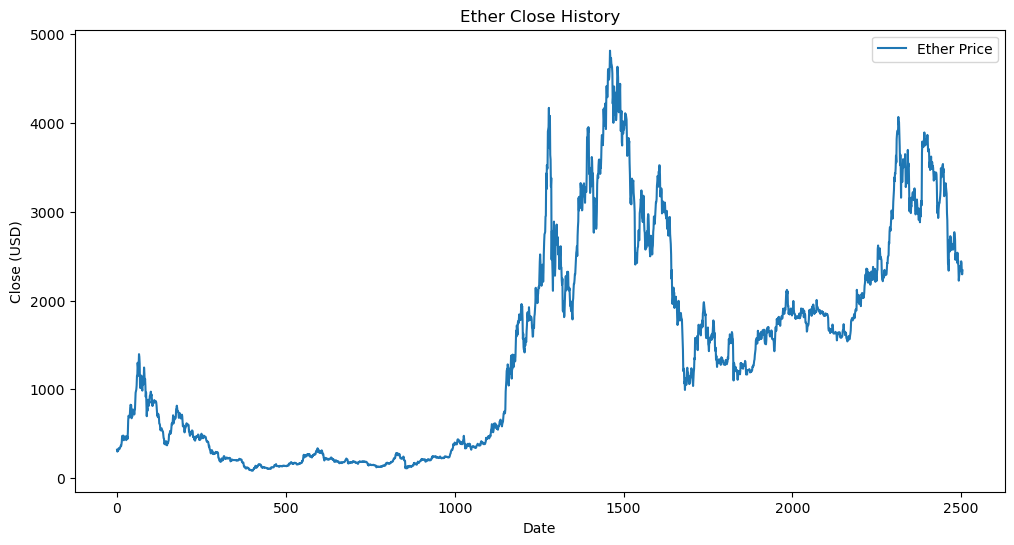

In [4]:

df1 = df[['Volume', 'Close']]

plt.figure(figsize=(12, 6))
plt.plot(df1['Close'], label="Ether Price")
plt.title('Ether Close History')
plt.xlabel('Date')
plt.ylabel('Close (USD)')
plt.legend()
plt.show()

In [5]:
#file = "~/Desktop/ETH-USD.csv"
#df = pd.read_csv(file)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [6]:
df_eth = df[["Date", "Volume"]]
df_eth = df_eth.rename(columns={"Date":"ds", "Volume":"y"})
df_eth.head()

,ds,y
0,2017-11-09,893249984
1,2017-11-10,885985984
2,2017-11-11,842300992
3,2017-11-12,1613479936
4,2017-11-13,1041889984


In [7]:
df_eth_P = df[["Date", "Close"]]
df_eth_P = df_eth_P.rename(columns={"Date":"ds", "Close":"y"})
df_eth_P.head()

,ds,y
0,2017-11-09,320.884003
1,2017-11-10,299.252991
2,2017-11-11,314.681000
3,2017-11-12,307.907990
4,2017-11-13,316.716003


In [8]:
model_eth = Prophet()


In [9]:
model_eth_P = Prophet()

In [10]:
model_eth.fit(df_eth)

16:02:12 - cmdstanpy - INFO - Chain [1] start processing
16:02:13 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
model_eth_P.fit(df_eth_P)

16:02:13 - cmdstanpy - INFO - Chain [1] start processing
16:02:13 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future_eth = model_eth.make_future_dataframe(periods=52, freq="w")
future_eth.head()


,ds
0,2017-11-09
1,2017-11-10
2,2017-11-11
3,2017-11-12
4,2017-11-13


In [13]:
future_eth_P = model_eth_P.make_future_dataframe(periods=52, freq="w")
future_eth_P.head()

,ds
0,2017-11-09
1,2017-11-10
2,2017-11-11
3,2017-11-12
4,2017-11-13


In [14]:
# Make predictions for Canada using the future_canada DataFrame
forecast_eth = model_eth.predict(future_eth)

# Display the first five rows of the forecast_canada DataFrame
forecast_eth.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-09,1.538045e+09,-6.380547e+09,8.436209e+09,1.538045e+09,1.538045e+09,-1.823615e+08,-1.823615e+08,-1.823615e+08,8.471676e+08,8.471676e+08,8.471676e+08,-1.029529e+09,-1.029529e+09,-1.029529e+09,0.0,0.0,0.0,1.355684e+09
1,2017-11-10,1.539611e+09,-6.533038e+09,8.102653e+09,1.539611e+09,1.539611e+09,-5.804758e+08,-5.804758e+08,-5.804758e+08,4.914766e+08,4.914766e+08,4.914766e+08,-1.071952e+09,-1.071952e+09,-1.071952e+09,0.0,0.0,0.0,9.591356e+08
2,2017-11-11,1.541178e+09,-8.738592e+09,5.326214e+09,1.541178e+09,1.541178e+09,-3.224280e+09,-3.224280e+09,-3.224280e+09,-2.113978e+09,-2.113978e+09,-2.113978e+09,-1.110302e+09,-1.110302e+09,-1.110302e+09,0.0,0.0,0.0,-1.683102e+09
3,2017-11-12,1.542744e+09,-8.501728e+09,6.003594e+09,1.542744e+09,1.542744e+09,-3.144326e+09,-3.144326e+09,-3.144326e+09,-2.001172e+09,-2.001172e+09,-2.001172e+09,-1.143154e+09,-1.143154e+09,-1.143154e+09,0.0,0.0,0.0,-1.601582e+09
4,2017-11-13,1.544310e+09,-5.794409e+09,8.331692e+09,1.544310e+09,1.544310e+09,-4.040888e+08,-4.040888e+08,-4.040888e+08,7.653447e+08,7.653447e+08,7.653447e+08,-1.169433e+09,-1.169433e+09,-1.169433e+09,0.0,0.0,0.0,1.140221e+09


In [15]:
# Make predictions for Canada using the future_canada DataFrame
forecast_eth_P = model_eth_P.predict(future_eth_P)

# Display the first five rows of the forecast_canada DataFrame
forecast_eth_P.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-09,748.472075,340.383644,1119.107204,748.472075,748.472075,-28.546033,-28.546033,-28.546033,-0.554040,-0.554040,-0.554040,-27.991993,-27.991993,-27.991993,0.0,0.0,0.0,719.926042
1,2017-11-10,747.202666,329.289766,1077.799024,747.202666,747.202666,-37.822095,-37.822095,-37.822095,-5.118447,-5.118447,-5.118447,-32.703649,-32.703649,-32.703649,0.0,0.0,0.0,709.380570
2,2017-11-11,745.933256,312.015620,1080.854690,745.933256,745.933256,-39.913147,-39.913147,-39.913147,-2.216458,-2.216458,-2.216458,-37.696689,-37.696689,-37.696689,0.0,0.0,0.0,706.020110
3,2017-11-12,744.663847,304.427805,1099.036693,744.663847,744.663847,-42.587560,-42.587560,-42.587560,0.223855,0.223855,0.223855,-42.811414,-42.811414,-42.811414,0.0,0.0,0.0,702.076288
4,2017-11-13,743.394438,328.825746,1083.033808,743.394438,743.394438,-45.175081,-45.175081,-45.175081,2.717540,2.717540,2.717540,-47.892620,-47.892620,-47.892620,0.0,0.0,0.0,698.219358


/Users/avalee/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/avalee/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


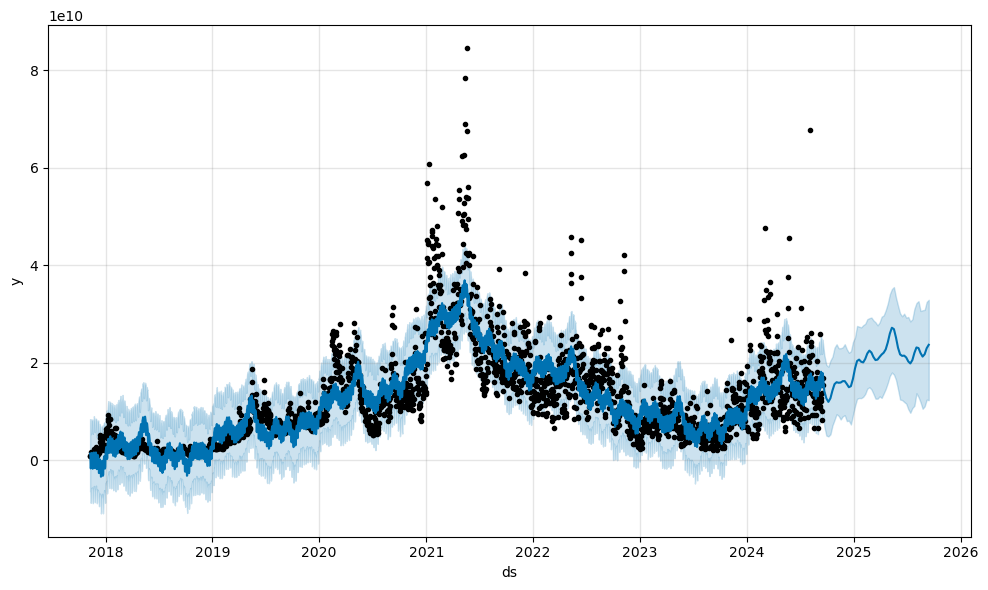

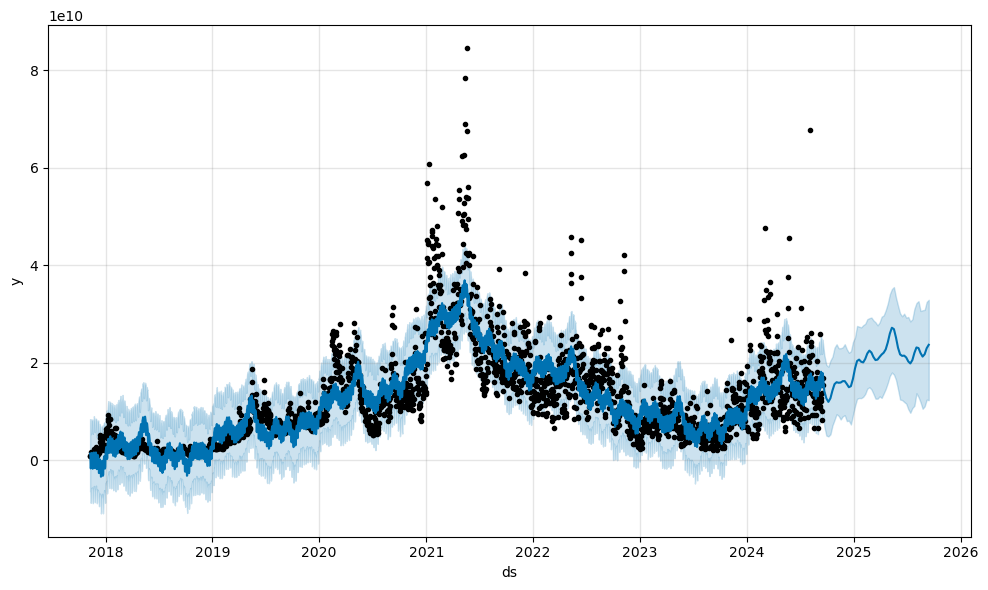

In [16]:
model_eth.plot(forecast_eth)

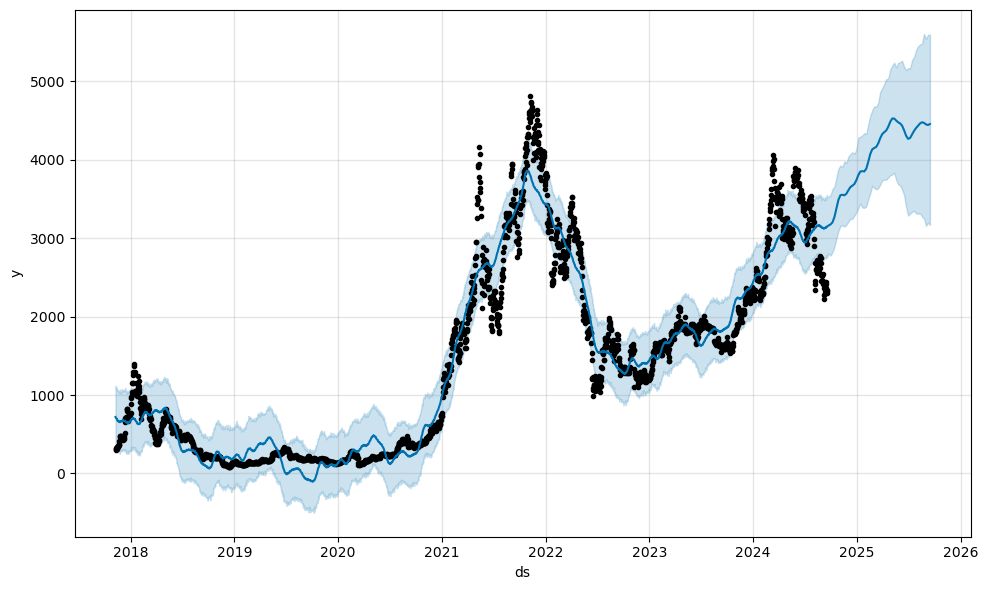

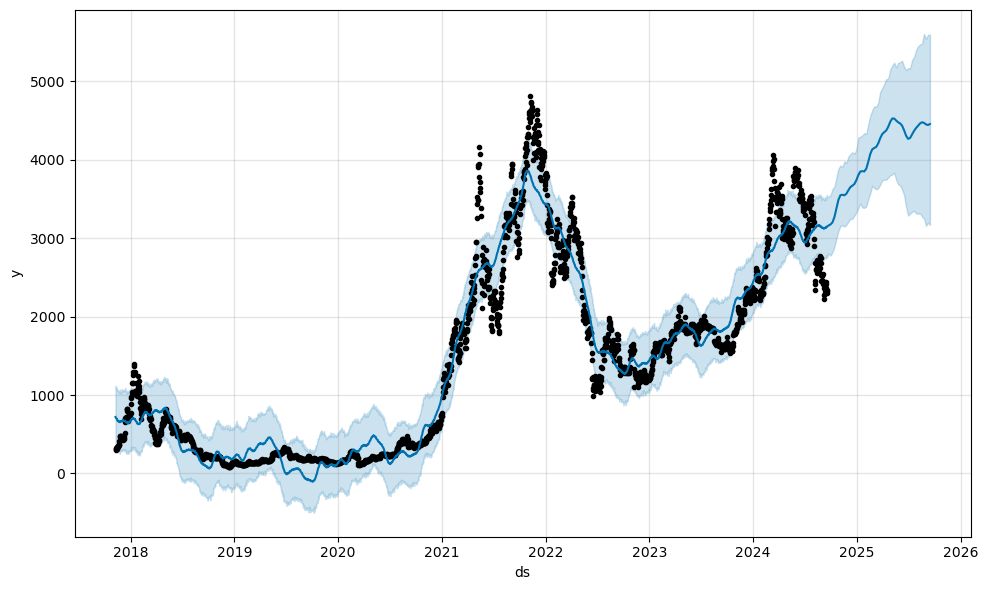

In [17]:
model_eth_P.plot(forecast_eth_P)

In [18]:
# Make predictions for Canada using the future_canada DataFrame
forecast_eth_P = model_eth_P.predict(future_eth)

# Display the first five rows of the forecast_canada DataFrame
forecast_eth_P.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-09,748.472075,357.501656,1110.167604,748.472075,748.472075,-28.546033,-28.546033,-28.546033,-0.554040,-0.554040,-0.554040,-27.991993,-27.991993,-27.991993,0.0,0.0,0.0,719.926042
1,2017-11-10,747.202666,316.525600,1108.577686,747.202666,747.202666,-37.822095,-37.822095,-37.822095,-5.118447,-5.118447,-5.118447,-32.703649,-32.703649,-32.703649,0.0,0.0,0.0,709.380570
2,2017-11-11,745.933256,325.267650,1075.298095,745.933256,745.933256,-39.913147,-39.913147,-39.913147,-2.216458,-2.216458,-2.216458,-37.696689,-37.696689,-37.696689,0.0,0.0,0.0,706.020110
3,2017-11-12,744.663847,309.796502,1068.272242,744.663847,744.663847,-42.587560,-42.587560,-42.587560,0.223855,0.223855,0.223855,-42.811414,-42.811414,-42.811414,0.0,0.0,0.0,702.076288
4,2017-11-13,743.394438,316.059631,1084.401987,743.394438,743.394438,-45.175081,-45.175081,-45.175081,2.717540,2.717540,2.717540,-47.892620,-47.892620,-47.892620,0.0,0.0,0.0,698.219358
